# Runge-Kutta Integrator Scheme

$\textbf{RK $1^{st}$ order:}$

It is similar to Forward Euler integrator scheme, i.e.

$$
x_{k +1} = x_{k} + \Delta t f(x_{k}, t_{k})
$$


$\textbf{RK $2^{nd}$ order:}$

The integrator scheme is:

$$
x_{k +1} = x_{k} + \Delta t f_{2}
$$
where
$ f_{1} = f(x_{k}, t_{k})$
and
$f_{2} = f(x_{k} \frac{\Delta t}{2} f_{1} ,t_{k} + \frac{\Delta t}{2})$

It means:
* The naive FE would take a vector field $f_{1}$ and take a full euler step in that direction
* The RK first takes half step towards the initial vector field (i.e $f_{1}$). Then it query the vector filed in that half step positon and evaluate the new vector field $f_{2}$. This new vector field would be pointing in any new direction (it could alos be pointing in same direction as $f_{1}$). 
* The RK takes full euler step in that new direction  (i.e. $f_{2}$) starting from the base point $x_{k}$

$\textbf{Error:}$
It is locally $O(\Delta t)^{3}$ every time step and the global error is $O(\Delta t)^{2}$ over entire trajectory.

$\textbf{RK $4^{th}$ order:}$

The integrator scheme is:

$$
x_{k +1} = x_{k} + \frac{\Delta t}{6}  (f_{1} +2 f_{2} + 2f_{3} + f_{4})
$$
where
$ f_{1} = f(x_{k}, t_{k})$


$f_{2} = f(x_{k} \frac{\Delta t}{2} f_{1} ,t_{k} + \frac{\Delta t}{2})$


$f_{3} = f(x_{k} \frac{\Delta t}{2} f_{2} ,t_{k} + \frac{\Delta t}{2})$


$f_{4} = f(x_{k} \frac{\Delta t}{2} f_{3} ,t_{k} + \Delta t)$

It means:
* The naive FE would take a vector field $f_{1}$ and take a full euler step in that direction
* The RK first takes half step towards the initial vector field (i.e $f_{1}$). Then it query the vector filed in that half step positon and evaluate the new vector field $f_{2}$.  
* Now take a half step in new vector field $f_{2}$ direction then query for the new vector $f_{3}$.
* Finally take a full Euler step in $f_{3}$ direction and evaluate the vector field at the new location to get $f_{4}$.
* The proportional of addition of above derived vector fields ($f_{1}f_{2}... $) in the final expression of integrator scheme has been calculated from Taylor series expansion so that to reduce the error.
* The RK takes full euler step in that new direction whiich is the average direction of above calculated vector fields ($f_{1}f_{2}... $)  starting from the base point $x_{k}$

$\textbf{Error:}$
It is locally $O(\Delta t)^{5}$ every time step and the global error is $O(\Delta t)^{4}$ over entire trajectory.

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use(['science', 'notebook', 'grid'])

### Function for RK-4
Writing a function for the 4th order RK

In [15]:
# Making a function to compute the 4th order RK

def rk4singlestep(fun,dt,t0,X0):
    """
    This function calculate the single step 4th order Runge-kutta.
    Input: fun is the ODE function, dt is time step, t0 is the initial time
    and x0 is the initial condition.
    """
    f1 = fun(t0,X0)
    f2 = fun(t0 + dt/2, X0 + (dt/2)*f1)
    f3 = fun(t0 + dt/2, X0 + (dt/2)*f2)
    f4 = fun(t0 + dt, X0 + dt*f3)
    Xout = X0 + (dt/6)*(f1+2*f2+2*f3+f4)
    return Xout

### Function for Lorentz 1963 system

The dynamical equations are:

$\dot{x} = \sigma (y - x)$

$\dot{y} = x (\rho -z) -y$

$\dot{z} = xy - \beta z$


where $\sigma = 10$, $\beta = 8/3$, and $\rho = 28$

Now we can rewrite the above three dynamical equations in a compact form as:
$ \dot{\textbf{X}} = f(X,t)$

where
$X = \begin{bmatrix} x\\ y\\z  \end{bmatrix}$

In [16]:
# Lorentz´s parameter (chaotic)
sigma = 10
beta = 8/3
rho = 28

def lorentz(t, X):
    """
    This function defines the dynamical equations that represent the Lorentz system.
    
    Here X is the three dimensional state vector.
    And the values for the sigma, beta and rho is already defined
    It returns an array 
    """
    dX = [sigma*(X[1] - X[0]),
                 X[0]*(rho-X[2])-X[1],
                 X[0]*X[1] - beta*X[2]]
    return np.array(dX)

In [22]:
#initial condition
X0 = [-8, 8, 27]

In [23]:
#compute trajectory
dt = 0.01
T = 10
n = int(T/dt)
t = np.linspace(0,T,n)

X = np.zeros((3,n)) # defining an empty array with 3 rows and n comlumns
X[:,0] = X0 # assigning the first column values as initial values

Xin = x0 # defining xin = x_k
for i in range (n-1):
    Xout = rk4singlestep(lorentz, dt, t[i], Xin)
    X[:,i+1] = Xout
    Xin = Xout


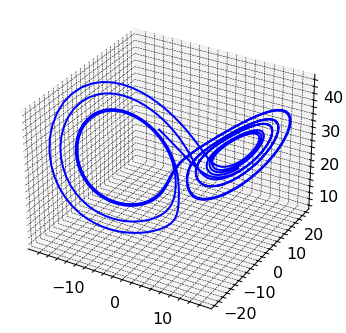

In [24]:
#plot
ax = plt.figure().add_subplot(projection='3d')
ax.plot(X[0,:], X[1,:], X[2,:], 'b')


#### Comaring with the built-in python RK solver

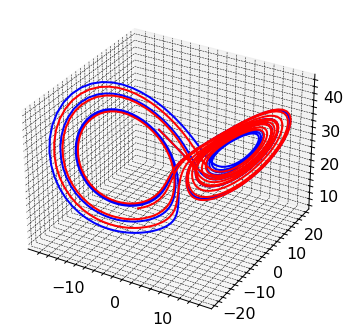

In [28]:
lorentz_sol = solve_ivp(lorentz, (0,T), X0, t_eval=t) # built in python integrator
t = lorentz_sol.t # time is stored in t
y = lorentz_sol.y.T # solutin is stored in y and then transposing it

# plot
ax = plt.figure().add_subplot(projection='3d')
ax.plot(X[0,:], X[1,:], X[2,:], 'b')
ax.plot(y[:,0], y[:,1], y[:,2], 'r')
plt.show()